# SPEECH EMOTION RECOGNITION

In [1]:
!pip install praat-parselmouth # TO REMOVE AFTER RUNNING INITIALLY

## Introduction
In this project, the purpose is to train a neural network to recognize emotion in english human speech.

**Speech Emotion Recognition (SER)** will be defined to be the act of teaching a neural network to recognize and identify emotions, from a given number of emotions, found in english auditory phrases. The motivation is to mimic how humans can intepret additional meaning in phrases which is not always reflected in the definition of the words in that sentence.

## Datasets
The main dataset that will be used throughtout this project is the dataset labelled **Speech Emotion Recognition (en)** compiled by **Dmitry Babko** which can be found [here](https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en) on **[kaggle](https://www.kaggle.com/)**.
It is a combination of four popular datasets which are labelled **CREMA-D** (Crowd-sourced Emotional Multimodal Actors Dataset), **RAVDESS** (Ryerson Audio-Visual Database of Emotional Speech and Song), **SAVEE** (Surrey Audio-Visual Expressed Emotion) and **TESS** (Toronto Emotional Speech Set).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Analysis of Data
Let us retrieve the data from these datasets so that we can peform some preprocessing and feature extraction steps, before we input it to our models. Each dataset includes multiple auditory phrases which are spoken in the different emotions and are the .wav file format.

In the **CREMA-D** dataset each file in structure in the following way: `1001_DFA_ANG_XX.wav`.

What we care about is the third bit, or in this case, `ANG`, which represents the emotion.

In this dataset there are 6 unique emotions which are as follows:
1. `ANG` - anger
2. `DIS` - disgust
3. `FEA` - fear
4. `HAP` - happiness
5. `NEU` - neutral
6. `SAD` - sadness

With this in mind let us now retrieve the **CREMA-D** dataset.

In [3]:
import os
import pandas as pd

crema_path = './drive/MyDrive/archive/Crema' # CHANGE THIS BEFORE FINAL SUBMISSION, CAN DO SO BY UPLOADING DATASET INSTEAD OF MOUNTING FROM GOOGLE DRIVE
# crema_path = './archive/Crema'

crema_to_emotion_dct = {
    'ANG': 'anger',
    'DIS': 'disgust',
    'FEA': 'fear',
    'HAP': 'happiness',
    'NEU': 'neutral',
    'SAD': 'sadness',
}

crema_paths = []

for file in os.listdir(crema_path):
    emotion = crema_to_emotion_dct[file.split('_')[2]]
    crema_paths.append((emotion, crema_path+'/'+file))

crema_df = pd.DataFrame.from_dict(crema_paths)
crema_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
crema_df.head()


,emotion,path
0,fear,./drive/MyDrive/archive/Crema/1079_TIE_FEA_XX.wav
1,anger,./drive/MyDrive/archive/Crema/1080_IEO_ANG_MD.wav
2,sadness,./drive/MyDrive/archive/Crema/1079_TIE_SAD_XX.wav
3,happiness,./drive/MyDrive/archive/Crema/1080_DFA_HAP_XX.wav
4,anger,./drive/MyDrive/archive/Crema/1080_IEO_ANG_LO.wav


In the **RAVDESS** dataset each file in structure in the following way: `02-01-06-01-02-01-12.wav`.

What we care about is the third bit, or in this case, `06`, which represents the emotion.

In this dataset there are 8 emotions which are as follows:
1. `01` - neutral
2. `02` - calm
3. `03` - happiness
4. `04` - sadness
5. `05` - anger
6. `06` - fear
7. `07` - disgust
8. `08` - surprise

However due to the similarities between calm and neutral, aswell as a widely accepted belief by psychologists, originally proposed by Paul Ekman, which suggests that "*...the six basic emotions are anger, disgust, fear, happiness, sadness, and surprise*", we will merge them to limit our emotions to the 6 aforementioned as well as no emotion, being neutral.

With this in mind let us now retrieve the **RAVDESS** dataset.

In [4]:
ravdess_path = './drive/MyDrive/archive/Ravdess/audio_speech_actors_01-24' # CHANGE THIS BEFORE FINAL SUBMISSION, CAN DO SO BY UPLOADING DATASET INSTEAD OF MOUNTING FROM GOOGLE DRIVE
# ravdess_path = './archive/Ravdess/audio_speech_actors_01-24'

ravdess_to_emotion_dct = {
    '01': 'neutral',
    '02': 'neutral',
    '03': 'happiness',
    '04': 'sadness',
    '05': 'anger',
    '06': 'fear',
    '07': 'disgust',
    '08': 'surprise',
}

ravdess_paths = []

for folder in os.listdir(ravdess_path):
    for file in os.listdir(ravdess_path+'/'+folder):
        emotion = ravdess_to_emotion_dct[file.split('-')[2]]
        ravdess_paths.append((emotion, ravdess_path+'/'+folder+'/'+file))

ravdess_df = pd.DataFrame.from_dict(ravdess_paths)
ravdess_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
ravdess_df.head()

,emotion,path
0,neutral,./drive/MyDrive/archive/Ravdess/audio_speech_a...
1,neutral,./drive/MyDrive/archive/Ravdess/audio_speech_a...
2,neutral,./drive/MyDrive/archive/Ravdess/audio_speech_a...
3,happiness,./drive/MyDrive/archive/Ravdess/audio_speech_a...
4,neutral,./drive/MyDrive/archive/Ravdess/audio_speech_a...


In the **SAVEE** dataset each file in structure in the following way: `DC_a01.wav`.

What we care about is the letter before the number, or in this case, `a`, which represents the emotion.

In this dataset there are 7 unique emotions which are as follows:
1. `a` - anger
2. `d` - disgust
3. `f` - fear
4. `h` - happiness
5. `n` - neutral
6. `sa` - sadness
7. `su` - surprise

With this in mind let us now retrieve the **SAVEE** dataset.

In [5]:
savee_path = './drive/MyDrive/archive/Savee' # CHANGE THIS BEFORE FINAL SUBMISSION, CAN DO SO BY UPLOADING DATASET INSTEAD OF MOUNTING FROM GOOGLE DRIVE
# savee_path = './archive/Savee'

savee_to_emotion_dct = {
    'a': 'anger',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happiness',
    'n': 'neutral',
    'sa': 'sadness',
    'su': 'surprise',
}

savee_paths = []

for file in os.listdir(savee_path):
    x = file.split('_')
    y = x[1][0:2] if x[1][0] == 's' else x[1][0]
    emotion = savee_to_emotion_dct[y]
    savee_paths.append((emotion, savee_path+'/'+file))

savee_df = pd.DataFrame.from_dict(savee_paths)
savee_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
savee_df.head()

,emotion,path
0,anger,./drive/MyDrive/archive/Savee/DC_a02.wav
1,anger,./drive/MyDrive/archive/Savee/DC_a01.wav
2,anger,./drive/MyDrive/archive/Savee/DC_a03.wav
3,anger,./drive/MyDrive/archive/Savee/DC_a13.wav
4,disgust,./drive/MyDrive/archive/Savee/DC_d10.wav


In the **TESS** dataset each file in structure in the following way: `OAF_back_angry.wav`.

What we care about is the third bit, or in this case, `angry`, which represents the emotion.

In this dataset there are 7 unique emotions which are as follows:
1. `angry` - anger
2. `disgust` - disgust
3. `fear` - fear
4. `happy` - happiness
5. `neutral` - neutral
6. `sad` - sadness
7. `ps` - surprise

With this in mind let us now retrieve the **TESS** dataset.

In [6]:
tess_path = './drive/MyDrive/archive/Tess' # CHANGE THIS BEFORE FINAL SUBMISSION, CAN DO SO BY UPLOADING DATASET INSTEAD OF MOUNTING FROM GOOGLE DRIVE
# tess_path = './archive/Tess'

tess_to_emotion_dct = {
    'angry': 'anger',
    'disgust': 'disgust',
    'fear': 'fear',
    'happy': 'happiness',
    'neutral': 'neutral',
    'ps': 'surprise', # pleasant surprise
    'sad': 'sadness',
}

tess_paths = []

for folder in os.listdir(tess_path):
    for file in os.listdir(tess_path+'/'+folder):
        emotion = tess_to_emotion_dct[file.split('.')[0].split('_')[2]]
        tess_paths.append((emotion, tess_path+'/'+folder+'/'+file))

tess_df = pd.DataFrame.from_dict(tess_paths)
tess_df.rename(columns={0:'emotion',1:'path'}, inplace=True)
tess_df.head()

,emotion,path
0,surprise,./drive/MyDrive/archive/Tess/YAF_pleasant_surp...
1,surprise,./drive/MyDrive/archive/Tess/YAF_pleasant_surp...
2,surprise,./drive/MyDrive/archive/Tess/YAF_pleasant_surp...
3,surprise,./drive/MyDrive/archive/Tess/YAF_pleasant_surp...
4,surprise,./drive/MyDrive/archive/Tess/YAF_pleasant_surp...


Now let us join the dataframes into one collective dataframe.

In [7]:
print(f'{crema_df.shape}\n{ravdess_df.shape}\n{savee_df.shape}\n{tess_df.shape}\n')

df = pd.concat([crema_df, ravdess_df, savee_df, tess_df], axis=0)

print(df.shape)

(7442, 2)
(1440, 2)
(480, 2)
(2800, 2)

(12162, 2)


So all together we have 12162 different audio files covering 7 unique emotions which we will train our models to recognize.

### Preprocessing
To correctly preprocess the data we must first undertake the challenge of understanding how humans convey emotion within their speech. We will propose that this can be done by observing the characterisitics of audio or sound. "*...the elements of sound should be listed separately as: pitch, duration, loudness, timbre, texture and spatial location*" (Russell Burton, 2015).

We would like to focus on pitch and duration as the key features to augment in each file. The reasoning being that not everyone has the same pitch, humans either have higher or lower voices and talk either faster or slower, changing the duration of the audio.

Another way to augment the audio will be to add noise to the sound. The idea behind this is to perhaps cover some of the audio with this noise to help the model identify when the actor is talking better.

The functions to augment the data are as follows.



In [8]:
import math
import numpy as np
import librosa

def add_noise(data):
    '''Signal to noise ratio is as follows: SNR = 2 * (A_signal - A_noise)
    according to the derivation on https://en.wikipedia.org/wiki/Signal-to-noise_ratio.'''
    A_signal = math.sqrt(np.mean(data**2))
    noise = np.random.normal(0, A_signal/3, data.shape)
    A_noise = math.sqrt(np.mean(noise**2))
    SNR = 2 * (A_signal - A_noise)
    return data + noise * SNR

def pitch_audio(data, sr, pitch_factor):
    '''A positive value increases the pitch, a negative value decreases it.
    For example, pitch_factor = 2.0 increases the pitch by 2 semitones (one octave).'''
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=pitch_factor)

def stretch_audio(data):
    '''Stretch the data a certain amount.'''
    amount = np.random.random()
    amount = amount if amount > 0.45 else amount + 0.45 # want to make sure audio isn't too long
    stretched_data = librosa.effects.time_stretch(y=data, rate=amount)
    return librosa.util.fix_length(data=stretched_data,size=len(data))

Let us observe the effect this has on our data through analysing the waveform, spectrogram and listening to the audio itself.

To do this let us also create and import the following functions.

In [9]:
import matplotlib.pyplot as plt
from IPython.display import Audio

def generate_waveform(emotion, augmentation, filename, data, sr):
    '''Create a waveform with the data provided.'''
    plt.figure(figsize=(9, 4))
    plt.title(f'{augmentation.title()} {emotion.lower()} waveform | {filename}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (% Scale)') # time - floating point
    librosa.display.waveshow(y=data, sr=sr)
    return plt

def generate_spectrogram(emotion, augmentation, filename, data, sr):
    '''Create a spectrogram with the data provided.'''
    x = librosa.stft(data) # time - frequency domain
    xdB = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(9, 4))
    plt.title(f'{augmentation.title()} {emotion.lower()} spectrogram | {filename}')
    librosa.display.specshow(xdB, sr=sr, x_axis='time', y_axis='hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    cb = plt.colorbar()
    cb.set_label('Amplitude (dB)', rotation=270, labelpad=20)
    return plt

Now let us retrieve the audio we will be observing these changes on.

In [10]:
filename = df.iat[0,1]
emotion = df.iat[0,0]

Let us now view and listen to the audio.

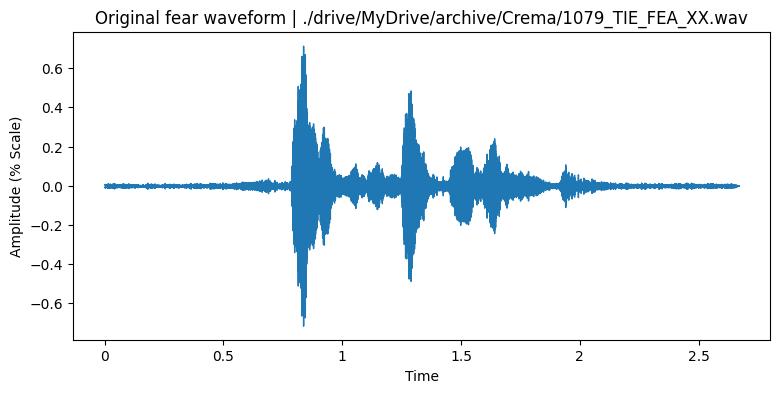

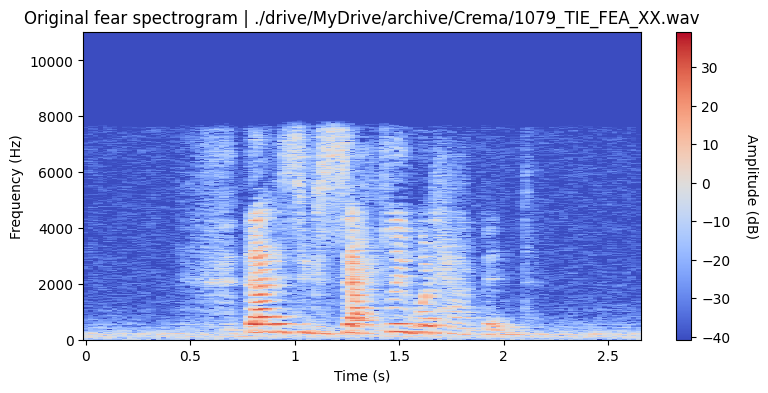

In [11]:
data, sr = librosa.load(filename)

generate_waveform(emotion, 'original', filename, data, sr).show()
print()
generate_spectrogram(emotion, 'original', filename, data, sr).show()
print()

Audio(data=data, rate=sr)

Let us perform the noise augmentation and observe the changes.

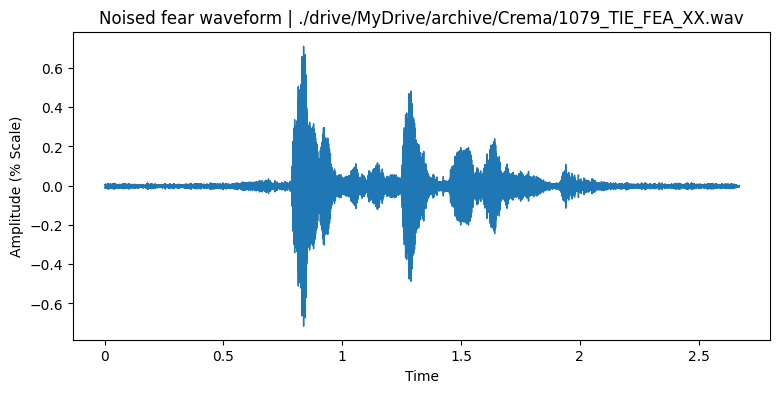

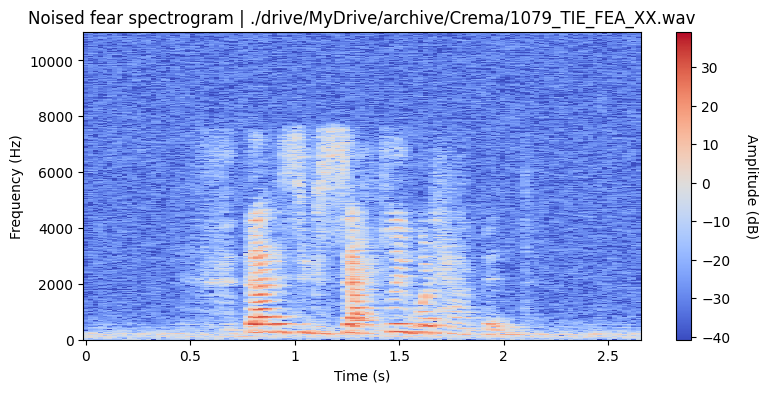

In [12]:
noised_data = add_noise(data)

generate_waveform(emotion, 'noised', filename, noised_data, sr).show()
print()
generate_spectrogram(emotion, 'noised', filename, noised_data, sr).show()
print()

Audio(data=noised_data, rate=sr)

Let us peform the pitch augmentation and observe the changes.

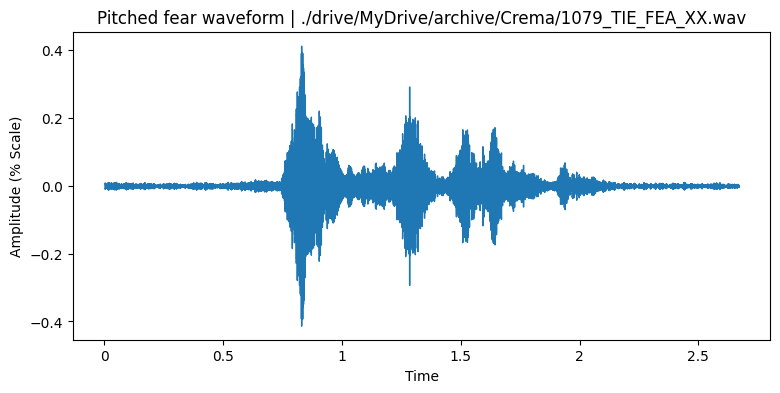

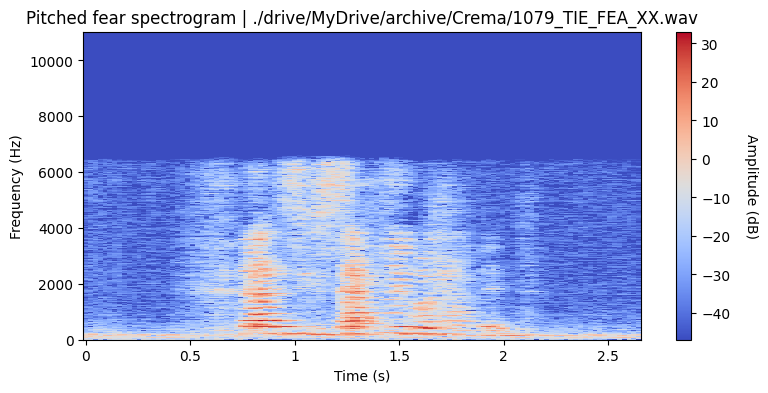

In [13]:
pitched_data = pitch_audio(data, sr, -3.0)

generate_waveform(emotion, 'pitched', filename, pitched_data, sr).show()
print()
generate_spectrogram(emotion, 'pitched', filename, pitched_data, sr).show()
print()

Audio(data=pitched_data, rate=sr)

Finally let us perform the stretch augmentation and observe the changes.

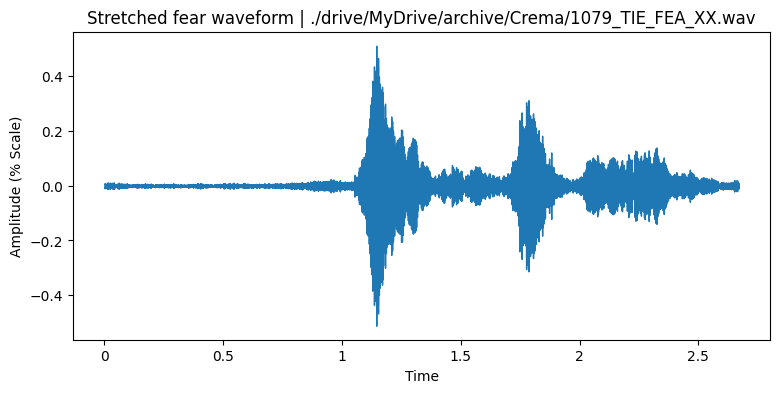

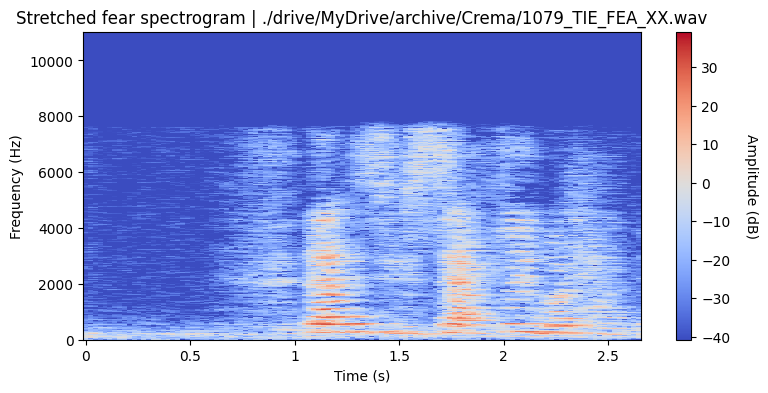

In [14]:
stretched_data = stretch_audio(data)

generate_waveform(emotion, 'stretched', filename, stretched_data, sr).show()
print()
generate_spectrogram(emotion, 'stretched', filename, stretched_data, sr).show()
print()

Audio(data=stretched_data, rate=sr)

To aid the model with it's learning, it would also be beneficial to extract key features from the audio and input those features to our model.

The features we will be abstracting are the following:
1. **MFCC (Mel Frequency Cepstral Coefficcients)** - Often used to describe timbre in MIR (Music Information Retrieval). As it is related to one of the characteristics of voice and sound, it will be useful when recognizing emotion.
2. **RMS (Root Mean Square)** - Used to describe intesity or amplitude of a sound wave. Emotions can often alter the loudness of one's voice so it will be useful to analyze.
3. **ZCR (Zero Crossing Rate)** - Detects the amount of times a sound wave changes between being positive and negative. Emotions can heighten or lessen this effect so it will be useful.
4. **F0 (Fundamental Frequency)** - "*perceived as pitch, [it] is the first and arguably most salient auditory component humans are exposed*" to and it conveys emotion within human speech, so it will be useful (Liquan Liu, 2022).
5. **Jitter** - Caused by irregular vocal cord vibration which disturbs the frequency of the sound, large irregularities can be correlated to emotion as the cause, which will make it useful for recognition.
6. **Shimmer** - The same as jitter but it disturbs the amplitude of the sound, so it will be useful.
7. **Speech Rate** - Emotions can cause one to talk faster or slower due to stress which will make this useful for identification.

The functions to extract this data are as follows.

In [15]:
import parselmouth

def extract_mfcc(data, sr,flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

def extract_rms(data):
    return np.squeeze(librosa.feature.rms(y=data))

def extract_zcr(data):
    return np.squeeze(librosa.feature.zero_crossing_rate(data))

def extract_F0(data,sr):
    pitches, magnitudes = librosa.piptrack(y=data, sr=sr)
    return pitches[np.argmax(magnitudes, axis=0), np.arange(magnitudes.shape[1])]

def extract_jitter(filename):
    sound = parselmouth.Sound(filename)
    pointProcess = parselmouth.praat.call(sound, "To PointProcess (periodic, cc)", 75, 600)
    return parselmouth.praat.call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)

def extract_shimmer(filename):
    sound = parselmouth.Sound(filename)
    pointProcess = parselmouth.praat.call(sound, "To PointProcess (periodic, cc)", 75, 600)
    return parselmouth.praat.call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

def extract_speech_rate(data):
    return np.sum(librosa.zero_crossings(data)) / len(data)

Now that we have completed our data augmentation and feature extraction functions, we can now complete the preprocessing step by applying these function to each file in the collective dataframe.

However for each of the audios we can obtain a total of 12 different audios by combining all, some or none of our augmentations together.

They are as follows:
1. Original
2. Noised
3. Pitched higher
4. Pitched lower
5. Strecthed
6. Noised and pitched higher
7. Noised and pitched lower
8. Noised and stretched
9. Pitched higher and stretched
10. Pitched lower and stretched
11. Noised, pitched higher and stretched
12. Noised, pitched lower and stretched

First let us create a function to extract all of the features at once.

In [16]:
def extract_features(data, sr, path):
    return np.hstack((np.array([]),
      extract_zcr(data),
      extract_rms(data),
      extract_mfcc(data, sr),
      extract_F0(data,sr),
      extract_jitter(path),
      extract_shimmer(path),
      extract_speech_rate(data)
      ))

Now let us extract all these feature from each of our augmented audios, including the original audio.

In [17]:
def augment_data(df):
    X, Y = [], []
    print("Preprocessing data")
    for path, emotion, i in zip(df.path, df.emotion, range(df.path.shape[0])):

        # original data
        duration=2.5
        offset=0.6
        data, sr = librosa.load(path, mono=False, sr=None, duration=duration, offset=offset)

        lst = []

        # 1 augmentation
        lst.append(add_noise(data)) # noised
        lst.append(pitch_audio(data, sr, pitch_factor=2.0)) # pitched higher
        lst.append(pitch_audio(data, sr, pitch_factor=-2.0)) # pitched lower
        lst.append(stretch_audio(data)) # stretched

        # 2 augmentations
        lst.append(add_noise(lst[2])) # noised pitched higher
        lst.append(add_noise(lst[3])) # noised pitched lower
        lst.append(add_noise(lst[4])) # noised stretched

        lst.append(stretch_audio(lst[2])) # pitched higher stretched
        lst.append(stretch_audio(lst[3])) # pitched lower stretched

        # 3 augmentations
        lst.append(add_noise(lst[8])) # noised pitched higher stretched
        lst.append(add_noise(lst[9])) # noised pitched lower stretched

        # process features
        features = np.array(extract_features(data, sr, path))
        for element in lst:
            features = np.vstack((features, extract_features(element, sr, path)))  # stacking vertically

        if i % 100 == 0:
            print(f"{i} files have been processed")

        for feature in features:
            X.append(feature)
            Y.append(emotion)

        if i == 1000: # DONT KEEP THIS HERE
            break

    print("Done")

    # convert to dataframe
    extracted_df = pd.DataFrame(X)
    extracted_df["emotion"] = Y
    extracted_df = extracted_df.fillna(0)

    # save features
    features_path = "./drive/MyDrive/archive/features.csv"
    # features_path = "./archive/features.csv"
    extracted_df.to_csv(features_path, index=False)

    return extracted_df

In [18]:
processed_df = augment_data(df)

Preprocessing data
0 files have been processed
100 files have been processed
200 files have been processed
300 files have been processed
400 files have been processed
500 files have been processed
600 files have been processed
700 files have been processed
800 files have been processed
900 files have been processed
1000 files have been processed
Done


In [19]:
processed_df.shape

(12012, 1821)

In [20]:
processed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1811,1812,1813,1814,1815,1816,1817,1818,1819,emotion
0,0.133789,0.201172,0.236816,0.186523,0.139648,0.097168,0.091797,0.100098,0.100586,0.096191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
1,0.139648,0.208984,0.252441,0.212891,0.180664,0.136230,0.123047,0.115723,0.100586,0.095215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
2,0.136230,0.182617,0.227539,0.181641,0.142090,0.132324,0.120117,0.130859,0.125000,0.112305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
3,0.121094,0.183594,0.221191,0.180664,0.139160,0.104980,0.090332,0.091309,0.090332,0.079590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
4,0.127930,0.184082,0.244141,0.235840,0.206055,0.176758,0.146973,0.109863,0.119141,0.128418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear


The preprocessing is now complete.

We have a total of 7 emotion classes to train the models on, which are:
1. anger
2. disgust
3. fear
4. happiness
5. neutral
6. sadness
7. surprise

Now let us input the extracted features into the models.


## Models
We will be conducting a comparison between two models to decide which model performs this recognition task with greater accuracy.

The first model will be a LSTM (Long Short-Term Memory) model and the second model will be a CNN (Convolutional Neural Network) model.

The LSTM model was chosen as the first model since it "*...is able to learn long range dependencies using a combination of forget, input and output gates*" (Hochreiter & Schmidhuber, 1998). Thus for a time based recognition problem like this one, it can be applied.

The CNN Model was chosen as the second model since it "*...uses the already supplied dataset to it for training purposes, and predicts the possible future labels to be assigned*" and "*it processes all the layers, and hence detects all the underlying features, automatically*" (SSLA, 2013). Since our datasets are labelled, this is a prediction/recognition task and we have preprocessed a bunch of the audio's features, it can be applied.


First let us begin with transforming the preprocessed data, such that it can be provided to the models.

To do this let us first split our data into training and testing segments. We will use a standard split where 80% of our data will be used for testing and 20% will be used for evaluation. We will also shuffle the order of the data to avoid getting stuck in a local minimum. The `X` will be the extracted features from every piece of data and `Y` will be the emotion label for those pieces of data.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = processed_df.iloc[:, : -1]
Y = processed_df.iloc[:, -1]

lb = LabelEncoder()
Y = lb.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2, shuffle=True)

Let us also encode the `Y` labels to be an interger which is mapped to one of the seven emotion classes.

In [36]:
from keras.utils import to_categorical

Y_train_one_hot = to_categorical(Y_train, num_classes=7)
Y_test_one_hot = to_categorical(Y_test, num_classes=7)

Now let us standardize our `X` data like so, to avoid errors within the models.

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Finally before we use the models let us define some callback and evaluation functions which we can use to monitor the models.

An early stopping function can be used to stop training once we are happy with the results we are producing.


In [24]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc', mode='auto', patience=5, restore_best_weights=True)

A reduce learning rate function can be used to help the function learn quicker at certain times.

In [25]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

A recall function can be used to evaluate the model. Although the `keras` library natively includes the `recall` function, we will define it to later be used in the `f1 score` function.

In [26]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

A precision function can be used to evaluate the model. Although the `keras` library natively includes the `precision` function, we will define it to later be used in the `f1 score` function.

In [27]:
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

A f1 score function can be used to evaluate the model.

In [28]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Let's also define the batch size and number of epochs for both models.

In [29]:
epochs = 20
batch_size = 128

### LSTM Model

Let us now define our LSTM model as the following.

**PROBABLY EXPLAIN WHY YOU 'CHOSE' SOME OF THE THINGS**

In [33]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Flatten

LSTM_model = Sequential()

LSTM_model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(LSTM(64, return_sequences=True))
LSTM_model.add(Dropout(0.2))

LSTM_model.add(Flatten())
LSTM_model.add(Dense(64, activation='relu'))

LSTM_model.add(BatchNormalization())
LSTM_model.add(Dense(7, activation='softmax'))

LSTM_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc', f1_m, recall_m, precision_m])

LSTM_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1820, 128)         66560     
                                                                 
 dropout_2 (Dropout)         (None, 1820, 128)         0         
                                                                 
 lstm_3 (LSTM)               (None, 1820, 64)          49408     
                                                                 
 dropout_3 (Dropout)         (None, 1820, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 116480)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                7454784   
                                                                 
 batch_normalization_7 (Batc  (None, 64)              

We will now run and save our LSTM model.

In [ ]:
LSTM_history = LSTM_model.fit(X_train, Y_train_one_hot, validation_data=(X_test, Y_test_one_hot),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[early_stopping, reduce_lr])

LSTM_path = "./drive/MyDrive/archive/LSTM_model.h5"
# LSTM_path = "./archive/LSTM_model.h5"
LSTM_model.save(LSTM_path)

### CNN Model

Let us now define our CNN model as the following.

**PROBABLY EXPLAIN WHY YOU 'CHOSE' SOME OF THE THINGS**

In [38]:
from keras.layers import Conv1D, MaxPooling1D

CNN_model = Sequential()

CNN_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

CNN_model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

CNN_model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

CNN_model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

CNN_model.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

CNN_model.add(Flatten())
CNN_model.add(Dense(512, activation='relu'))

CNN_model.add(BatchNormalization())
CNN_model.add(Dense(7, activation='softmax'))

CNN_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc', f1_m, recall_m, precision_m])

CNN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 1820, 512)         3072      
                                                                 
 batch_normalization_14 (Bat  (None, 1820, 512)        2048      
 chNormalization)                                                
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 910, 512)         0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 910, 512)          1311232   
                                                                 
 batch_normalization_15 (Bat  (None, 910, 512)         2048      
 chNormalization)                                                
                                                      

KeyboardInterrupt: ignored

We will now run and save our CNN model.

In [ ]:
CNN_history = CNN_model.fit(X_train, Y_train_one_hot, validation_data=(X_test, Y_test_one_hot),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[early_stopping, reduce_lr])

CNN_path = "./drive/MyDrive/archive/CNN_model.h5"
# CNN_path = "./archive/CNN_model.h5"
CNN_model.save(CNN_path)

Now that we have run both of our models, let's examine and compare the results.

## Results (3 marks):
`Results are clearly shown, discussed, evaluated using appropriate metrics. Good use of graphs or other visualizations, where possible. Comparison with previous methods/SOTA, where appropriate.`

results

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

def printStats(y_test , predicted):
  print(classification_report(y_test , predicted))
  cm = metrics.confusion_matrix(y_test, predicted, labels=list(range(0, 8)))
  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(range(0, 8)))
  disp.plot()
  return plt

def mapping(arr):
    pred = []
    for i in range(len(arr)):
        idx = 0
        max = 0
        for j in range(8):
            if arr[i][j] > max:
                max = arr[i][j]
                idx = j
        pred.append(idx)
    return pred

In [ ]:
LSTM_Y_pred = LSTM_model.predict(X_test)
CNN_Y_pred = CNN_model.predict(X_test)

printStats(list(Y_test), mapping(LSTM_Y_pred)).show()
printStats(list(Y_test), mapping(CNN_Y_pred)).show()

## Discussion (3 marks):
Discuss the results and analysis, provide some insight about system performance, including strengths, weaknesses, limitations and possible future work.

## Acknowledgements
Thanks to [this](https://www.kaggle.com/code/dmitrybabko/speech-emotion-recognition-conv1d) notebook which helped start us write our own notebook and verbalize our thoughts. **PROBABLY REMOVE THISE, ALSO MAKE SURE TO MAKE THE ENTIRE NOTEBOOK GENERIC, NO MY, WE, US, I RUBBISH**

## Writing (3 marks):
Notebook(s) are presented in a readable format, appropriate section/subsection headings are provided in markdown format, codebase is easy to follow.